# Lecture 1. How hypotheses are treated in statistical inference?


## What are possible approaches to hypotheses representation and testing?

***

<div class="alert alert-block alert-info">
A statistical hypothesis, sometimes called confirmatory data analysis, is a hypothesis that is testable on the basis of observing a process that is modeled via a set of random variables

***

## Statistical hypothesis != scientific hypothesis

***

<div class="alert alert-block alert-info">

Scientific hypotheses seek to provide an explanation for natural phenomena

Statistical hypotheses are generally used to establish the existence of relationships (or lack thereof) between data sets. 


***

Ex.: Using a medical treatment as an example, a statistical hypothesis might attempt to illustrate, with statistical significance, whether a drug performs better than a placebo. 

A scientific hypothesis would then seek to explain the results, regardless of the results of the statistical hypothesis test (they perform the same or they do not). 


## Outline
1. Probability and sampling distributions
 1. Two ways to work with probability in Python
 2. Finite
 3. Discrete
 4. Continuous
 5. Histogram, kernel density distribution
 6. Random data generation with python and Spark MLLib

3. Central Limit Theorem and its pitfalls
4. Confidence intervals
5. Bootstraping

<center><img src="../pictures/correct_technique.png"></center>

## Types of statistical inference
***

There are two types of statistical inferences:

1. Estimation
  * Use information from the sample to estimate (or predict) the parameter of interest.
2. Statistical Test
  * Use information from the sample to determine whether a certain statement about the parameter of interest is true.

## Properties of good estimators
***
1. **Bias.** The center of the sampling distribution for the estimate is the same as that of the population.  When this property is true, the estimate is said to be unbiased.  The most often-used measure of the center is the mean.
2. **Variance.** Smallest standard error when compared to other estimators.  For example, in the normal distribution the mean and median are essentially the same.  However, the standard error of the median is about 1.25 times that of the standard error of the mean. So,  mean is a better estimator than the median when the data is normal (or approximately normal).

## Bias vs. Variance
<center><img src="../pictures/visual_bias_variance.png" width="800"></center>

# Probability and sampling distributions
## Two ways to work with distributions in Python
***
- [Scipy](https://www.scipy.org/)

>This module contains a large number of probability distributions as well as a growing library of statistical functions.


- [SymPy](http://www.sympy.org/)

> SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python.


## Remarks
***
1. pdf
 * Probability density function
2. cdf
 * Cumulative distribution function
3. skewness
 * Skewness γ_1 represents the third standardized moment. Skewness is the measure of how symmetric the data is. Negative values show that the data distribution mass is to the left, otherwise to the right (if comparing to normal distribution).
4. kurtosis
 * Kurtosis measure is the fourth standardized. Higher kurtosis corresponds to more heavy tails of the distribution.


# Working with stats in SymPy
***
## Finite Variables Types



In [50]:
from sympy.stats import Die, density, E, variance, std, cdf,P,Poisson, skewness
from sympy import symbols, pprint, Eq, Symbol, simplify
import numpy as np
import matplotlib.pyplot as plt

X = Die('X', 6)
density(X).dict

{1: 1/6, 2: 1/6, 3: 1/6, 4: 1/6, 5: 1/6, 6: 1/6}

In [51]:
cdf(X)

{1: 1/6, 2: 1/3, 3: 1/2, 4: 2/3, 5: 5/6, 6: 1}

In [52]:
pprint([E(X), std(X)])

⎡     √105⎤
⎢7/2, ────⎥
⎣      6  ⎦


In [53]:
pprint(P(X > 3))

1/2


In [54]:
pprint(P(Eq(X,5), X > 2)) 

1/4


## Discrete Types
***
Poisson Distribution

Wiki: In probability theory and statistics, the Poisson distribution ... is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time and/or space if these events occur with a known average rate and independently of the time since the last event.

<center><img src="../pictures/325px-Poisson_pmf.svg.png"></center>

## Examples
1. Arrival of buses at station
2. Floods in the world
3. Spam letters a day

In [55]:
rate = Symbol("lambda", positive=True)
z = Symbol("z")
Pois = Poisson("x", rate)
pprint(density(Pois)(z))


 z  -λ
λ ⋅ℯ  
──────
  z!  


In [56]:
pprint(cdf(Pois)(z))

⎧   -z - 1  z + 1                                   
⎪  λ      ⋅λ     ⋅(z + 1)⋅γ(z + 1, λ)               
⎪- ────────────────────────────────── + 1  for z ≥ 0
⎨               (z + 1)!                            
⎪                                                   
⎪                   0                      otherwise
⎩                                                   


In [57]:
pprint(variance(Pois))
pprint(simplify(skewness(Pois)))


   2            
- λ  + λ⋅(λ + 1)
1 
──
√λ


## Plotting PDF

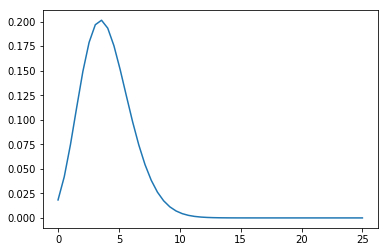

In [58]:
u = np.linspace(0, 25)
X = Poisson('X', 4)
D = density(X)
v1 = [D(i).evalf() for i in u]
plt.plot(u, v1)


## Plotting CDF
***

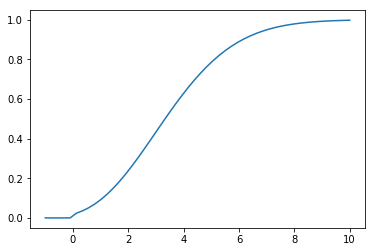

In [59]:
u = np.linspace(-1, 10)
X = Poisson('X', 4)
D = cdf(X)
v1 = [D(i).evalf() for i in u]
plt.plot(u, v1)

## Displaying Probability mass function

In [60]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

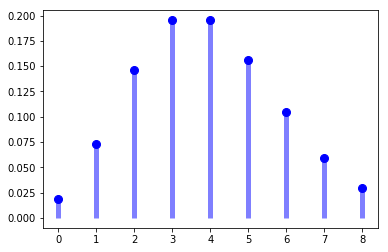

In [61]:
fig, ax = plt.subplots(1, 1)

mu = 4
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

In [62]:
from scipy.stats import *
import matplotlib.pyplot as plt
import numpy as np

# RVS histograms

/home/dmitry/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


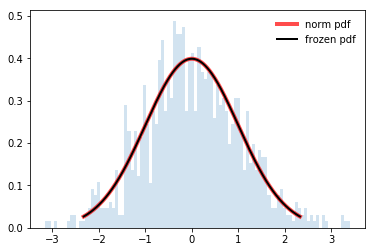

In [63]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
    norm.ppf(0.99), 10000)
ax.plot(x, norm.pdf(x),
    'r-', lw=4, alpha=0.7, label='norm pdf')
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
r = norm.rvs(size=1000)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2, bins=100)
ax.legend(loc='best', frameon=False)
plt.show()

In [64]:
mean, var, skew, kurt = norm.stats(moments='mvsk')
print (mean, var, skew, kurt)

0.0 1.0 0.0 0.0


## Kernel Density Estimation

In [65]:
from scipy.stats.kde import gaussian_kde
from scipy.stats import norm
from numpy import linspace,hstack
from pylab import plot,show,hist


/home/dmitry/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


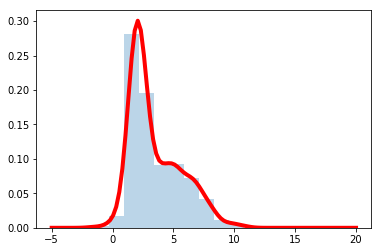

In [66]:
sampD1 = norm.rvs(loc=5.,scale=2,size=300)
sampD2 = norm.rvs(loc=2.0,scale=0.5,size=300)
samp = hstack([sampD1,sampD2])
# obtaining the pdf (my_pdf is a function!)
my_pdf = gaussian_kde(samp)

# plotting the result
x = linspace(-5,20,100)
plot(x,my_pdf(x),'r', lw=4) # distribution function
hist(samp,normed=1,alpha=.3) # histogram
show()

https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/
<img src="../pictures/kernel_dens.png">

# Probability and sampling distributions
## Random data generation with python and Spark MLLib
***
Random data generation is useful for randomized algorithms, prototyping, and performance testing. spark.mllib supports generating random RDDs with i.i.d. values drawn from a given distribution: uniform, standard normal, or Poisson.

Kernel density estimation also exists in Spark MLLib
***

https://spark.apache.org/docs/latest/mllib-statistics.html

# Central Limit Theorem
***

<div class="alert alert-block alert-info">
Let $\xi_1, \xi_2, ... , \xi_N$ be a set of $N$ independent random variates, which come from an arbitrary probability distribution $P(x_1, \cdots,x_N)$ with with mean $\mu$ and finite variance $\sigma^2$. Then sample mean
 
<center> $\overline{\xi} \longrightarrow \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right)$ as $n \rightarrow \infty$ </center>

or

<center> $ Z = \frac{\overline{\xi} - \mu}{\sigma / \sqrt{n}} = \frac{\sum\limits_{i=1}^{n}\xi_i - n\sigma}{\sigma\sqrt{n}} \longrightarrow 
\mathcal{N}\left(0, 1\right)$ as $n \rightarrow \infty$</center>
</div>

***
Resources: 
- https://www.khanacademy.org/math/statistics-probability
- https://onlinecourses.science.psu.edu/stat414

# Playing with CLT
***

In [67]:
%matplotlib inline
from scipy.stats import betaprime, norm
import matplotlib.pyplot as plt
import numpy as np



In [68]:
# выбрано непрерывное распределение betaprime со значениями a = 15, b = 4
a, b = 15., 4.
bp_rv = betaprime(a, b)

# функция bp_mean возвращает массив, состоящий из средних значений 1000 выборок объема n 
bp_mean = lambda n: [bp_rv.rvs(size=n).mean() for i in range(1000)]

# математическое ожидание и стандартное отклонение вычисляются следующим образом
mu = a / (b-1)
sigma = np.sqrt(a*(a+b-1)/(b-2))/(b-1)

print("betaprime mu: " +  str(round(mu,3)))
print("betaprime sigma: " + str(round(sigma,3)))


betaprime mu: 5.0
betaprime sigma: 3.873


/home/dmitry/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


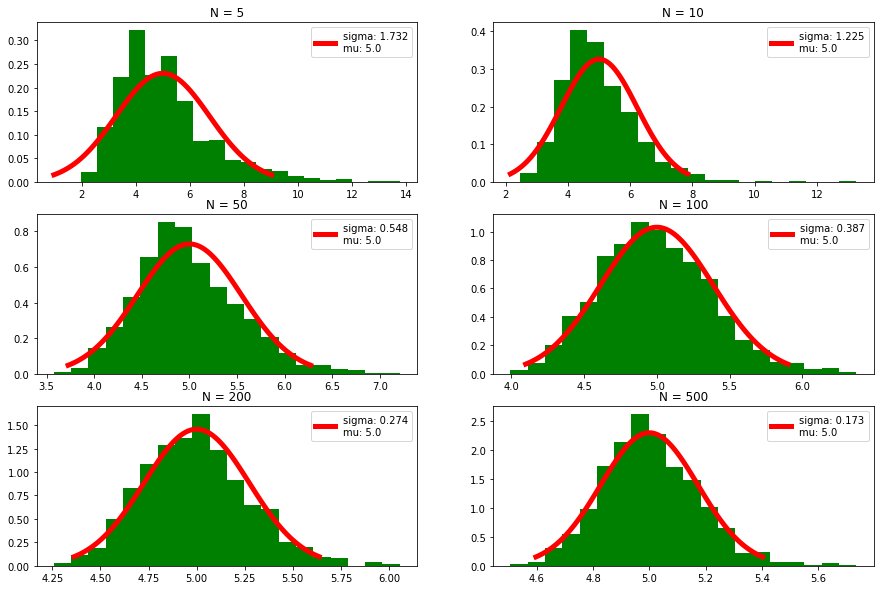

In [69]:
# определяем ось значений x
x_norm = lambda n: np.linspace(norm.ppf(0.01,loc=mu,scale=sigma/np.sqrt(n)), 
                               norm.ppf(0.99,loc=mu,scale=sigma/np.sqrt(n)), 100)

# для каждого из n  строим кортеж, состоящий из массива средних значений, соответствующего ему 
# оси значений и нормального распределения (мат. ожидания у распределений совпадают, среднеквадратичные отклонения 
# отличаются в sqrt(n) раз) и самого значения n

data = [(bp_mean(n), x_norm(n), 
         norm.pdf(x_norm(n), loc=mu,scale=sigma/np.sqrt(n)), n) for n in (5,10,50,100,200,500)]

# всего будет 6 графиков (по числу значений n)
fig, axs = plt.subplots(3,2, figsize=(15,10))
axs = axs.ravel()

for idx,ax in enumerate(axs):
    ax.hist(data[idx][0], bins=20, normed=True, color='g')
    ax.set_title('N = '+ str(data[idx][3]))
    label = 'sigma: ' + str(round(sigma/np.sqrt(data[idx][3]),3)) + '\nmu: ' + str(round(mu,3))
    ax.plot(data[idx][1], data[idx][2],'r-', lw=5, label=label)
    ax.legend(loc='best')

# Выводы: 1) при возрастании n точность аппроксимации возрастает, 2) при малых n распределение смещено влево,
# 3) математические ожидания совпадают,среднеквадратичные отклонения отличаются в sqrt(n) раз

# Limitations of CLT
***

The CLT approaches gaussian distribution with increasing sample size for a  statistic, but
<br />
<br />
<center><div class="alert alert-block alert-warning">
NB! No rule of thumb for  $n$
<br />
Always need to check (algebraically, via simulation) how close to normality we are, $n=2$ can be enough , $n=1000$ can be not
</div></center>


***
Resources:
- https://www.quora.com/Why-is-the-central-limit-theorem-considered-such-a-foundational-concept-to-inferential-statistics
- https://stats.stackexchange.com/questions/81074/how-useful-is-the-clt-in-applications
- https://stats.stackexchange.com/questions/61798/example-of-distribution-where-large-sample-size-is-necessary-for-central-limit-t/61849#61849


# Limitations of CLT
## Examples

time between events (lag between an ad and an increase in sales, or time between failures in reliability theory, or latency in IT).  What CLT says is that if you take enough samples of time between events, their means will follow a normal distribution (and believe me, they do!). This leads to a scary result of average times between events becoming negative with a nonzero probability.

the sample third and fourth moments are averages and so the CLT should apply. The Jarque-Bera test relies on that (plus Slutsky, I guess, for the denominator, along with asymptotic independence), in order to obtain a chi-square distribution for the sum of squares of standardized values.

# Limitations of CLT
***
Suppose, we have $\xi$ with a distribution like this:
<img src="../pictures/xzits.png">



# Limitations of CLT
***
$\overline{\xi}$ for $n = 1000$ has a shape:

<img src="../pictures/shape.png">

- near normal to treat for some cases (density for 2 sd of the mean)
- not normal to assess probability of being more than 3 sd




## Limitations of CLT
Even when n is around 300 the distribution doe not seem to be normal!
<img src="../pictures/L01_sk_kurt.png">



## TODO

Using sympy or scipy library create continuous random variable with such pdf, that CLT does not hold for huge n (say, 1000) 

## Confidence intervals vs Prediction Intervals 

http://www.mit.edu/~6.s085/notes/lecture2.pdf

https://plato.stanford.edu/entries/paradox-simpson/

http://statisticsbyjim.com/hypothesis-testing/confidence-prediction-tolerance-intervals/


# Interpretation of CI, PI

<center><img src="../pictures/CI20.png"></center>

A prediction interval is a range that likely contains the value of the dependent variable for a single new observation given specific values of the independent variables. With this type of interval, we’re predicting ranges for individual observations rather than the mean value.


## Confidence intervals based on bootstrap with Apache Spark
http://www.kdnuggets.com/2016/01/hypothesis-testing-bootstrap-apache-spark.html

# Questions?